<a href="https://colab.research.google.com/github/krishchat/Cardio-Fitness-Treadmill-EDA/blob/main/Cardio_Fitness_Product_Recommendation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #  **Project Description**

---

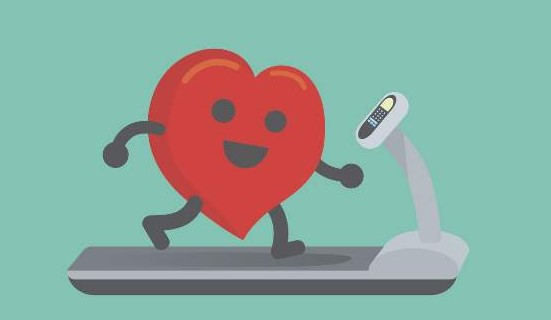





## Context:

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

## Business Requirement:

*  Come up with a customer profile (characteristics of a customer) of the different products
*  Perform univariate and multivariate analyses
*  Generate a set of insights and recommendations that will help the company in targeting new customers.

 ## Data Dictionary:

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very 
unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run


# **Sanity Checks**

**Importing all the required Libraries to perform my analysis**

In [ ]:
# For reading and manipulating data
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For mounting Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Now, lets import the given Dataset**

In [ ]:
cardio_df = pd.read_csv('/content/drive/MyDrive/PGP - AI ML Course/Cardio Good Fitness Project/CardioGoodFitness.csv')

**Lets watch out first 5 records of the dataset**

In [ ]:
cardio_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Lets watch out last 5 records of the dataset**

In [ ]:
cardio_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


**Lets checkout the number of rows and coluns in the dataset**

In [ ]:
print('No. of Records = ', cardio_df.shape[0])
print('No. of Features = ', cardio_df.shape[1])

No. of Records =  180
No. of Features =  9


**Size and Dimension of the Dataset**

In [ ]:
print('This is a {}D dataset and size of this dataset is {} kb'.format(cardio_df.ndim, cardio_df.size))

This is a 2D dataset and size of this dataset is 1620 kb


**Finding out the datatype of each column in the dataset**

In [ ]:
cardio_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object



1. There are 6 numerical columns in the dataset.
2. And there are 3 object type columns in the dataset.
3. Product, Gender & Marital Status are object type (String) columns.
4. Remaining Columns, like Age, Education, Usage, Fitness, Income and Miles are all numericals (integers).



> Datatype of all the columns looks **correct**.




**Lets look for Missing / Null values in the dataset**

In [ ]:
cardio_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64



1.   Wonderful, there are **no missing** values in the dataset.
2.   Data gathering process worked absolutely fine.



**Check for Duplicate records**

In [ ]:
cardio_df.duplicated().sum()

0



1.  Good, there are no duplicate records found in the dataset.
2.  No need to clear anything



**Let's check the statistical summary of the data.**

In [ ]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.00,28.79,6.94,18.00,24.00,26.00,33.00,50.00
Education,180.00,15.57,1.62,12.00,14.00,16.00,16.00,21.00
Usage,180.00,3.46,1.08,2.00,3.00,3.00,4.00,7.00
Fitness,180.00,3.31,0.96,1.00,3.00,3.00,4.00,5.00
Income,180.00,53719.58,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00
Miles,180.00,103.19,51.86,21.00,66.00,94.00,114.75,360.00




1.   **Fitness:**   Average fitness score of customers is 3.31. Distribution of fitness score throughout customer looks good.
2.   **Miles:**     Average distance covered by customer is 103.19 miles. 50% of customers cover less than or equal to 94 miles which is great. Some customers cover 360 miles which could be outliers.
3.    We have to check if any correlation exists between miles covered and fitness score.
4. **Age:** On an average people around 28 years are more into this treadmill products with 75% within 33. None below 18 years is into this but there are some at 50. We have to check if these are outliers.
5. **Usage:** Customers uses treadmill in every other day which makes it an average of nearly 3.5 times a week. Some customers uses 7 days a week. We have to check their miles run and fitness score to find correlations.  Standard deviation is not much, which means distribution of usage is fine.
6.  **Income:** Average income of people buying a product is 53.7k with 75% of  them earn less than or equal to 58.6k. Hence we can say, people with income around 55k are more likely to buy treadmill. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column. Standard Deviation is also very high for this column which indicates we have to check out how income is distributed.
7. **Education:** Educational awareness of Customers is very close to each other with an average education of 15.5 years and 75% of them are within or equal to 16 years. 







**Checking how many Products are there in dataset**

In [ ]:
# Converting numpy array to pandas dataframe for a better display
df_product = pd.DataFrame(cardio_df['Product'].unique()) 

print('We are working with {} unique products which are as follows : '.format(cardio_df['Product'].nunique()))
df_product

We are working with 3 unique products which are as follows : 


,0
0,TM195
1,TM498
2,TM798


**Lets find out the Percentage of Male and Female customers**

In [ ]:
print('Percentage of Male and Female Customers in given dataset is: \n\n ', cardio_df['Gender'].value_counts(normalize= True) * 100 )

Percentage of Male and Female Customers in given dataset is: 

  Male     57.78
Female   42.22
Name: Gender, dtype: float64


**Lets see if Marital Status depends on buying a Treadmill or not**

In [ ]:
print('Percentage of Partnered and Single Customers in given dataset is: \n\n ', cardio_df['MaritalStatus'].value_counts(normalize= True) * 100 )

Percentage of Partnered and Single Customers in given dataset is: 

  Partnered   59.44
Single      40.56
Name: MaritalStatus, dtype: float64


**Lets see how Gender and Marital Status together influencing the data**

In [ ]:
df_gender_ms = cardio_df.groupby(['Gender', 'MaritalStatus']).size().reset_index(name= 'Count')
df_gender_ms['Percentage'] = df_gender_ms['Count']/df_gender_ms['Count'].sum() * 100

print('One-third of the data are Partnered Male \n\n')

df_gender_ms

One-third of the data are Partnered Male 




,Gender,MaritalStatus,Count,Percentage
0,Female,Partnered,46,25.56
1,Female,Single,30,16.67
2,Male,Partnered,61,33.89
3,Male,Single,43,23.89


**Some Observations on the Categorical Data**

1.  We have only 3 different Products which are TM195, TM498 and TM798.
2.   It's almost a 60-40 split between Male and Female customers respectievely.
3.   It's again a 60-40 split between Partnered and Single customers respectievely.
4.  Partnered-Male contributes to one third of the data.

# **Univariate Analysis**

In [ ]:
cardio_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Creating a Function to reuse Plotting process accross multiple Features**

In [ ]:
#Creating my own function to calculate the distribution of each featrure in the dataset:

def myplot(df_sample, xaxis, min_threshold, max_threshold):
  fig, axes =plt.subplots(1,2,figsize=(12, 5))
  sns.histplot(data=df_sample, x=xaxis, kde= True, ax=axes[0]);
  sns.boxplot(data = df_sample, x=xaxis,showmeans=True, orient='h', ax=axes[1]);
  #Finding what percentage of customer are more than threshold
  print(' {}% of Customers are less than {} which can be considered as Outliers in the data'.format(round(df_sample[df_sample[xaxis] < min_threshold].shape[0] / df_sample.shape[0] * 100, 2), min_threshold))
  print(' {}% of Customers are more than {} which can be considered as Outliers in the data'.format(round(df_sample[df_sample[xaxis]> max_threshold].shape[0] / df_sample.shape[0] * 100, 2), max_threshold))

**Lets check the distribution of Fitness of all customers**

 1.11% of Customers are less than 2 which can be considered as Outliers in the data
 0.0% of Customers are more than 5 which can be considered as Outliers in the data


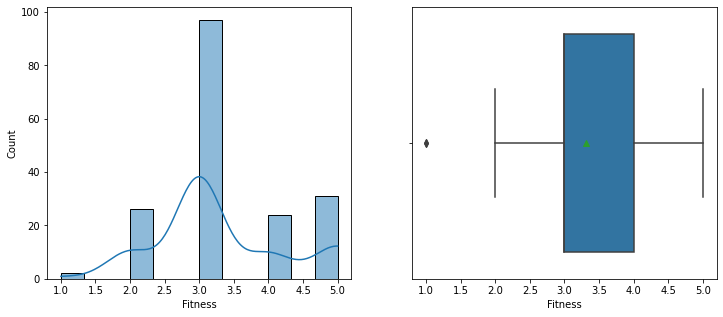

In [ ]:
myplot(df_sample = cardio_df, 
       xaxis = 'Fitness', 
       min_threshold = 2, 
       max_threshold = 5);

**Observation:**

1. Fitness is **almost** normally distributed.
2. The Box Plot shows that Q1 and Median coincides at 3 with some outliers on left.
3. 1.11% of Customers are less than 2 which can be considered as Outliers in the data.

**Lets see how Product sale is distributed**

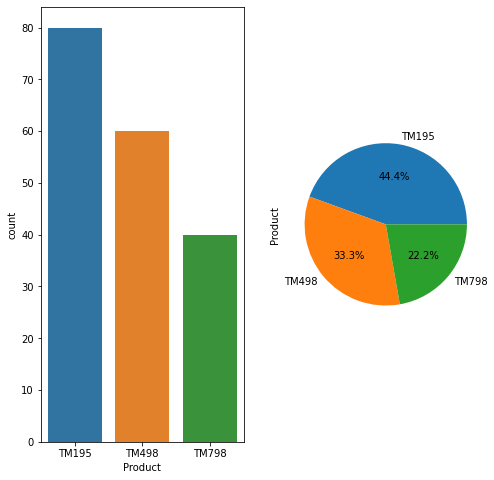

In [ ]:
fig, axes = plt.subplots(1,2, figsize= (12,5))
sns.countplot(data=cardio_df, x='Product', ax=axes[0]);
cardio_df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8), ax=axes[1]);

**Observation:**

1. Most customers uses TM195, followed by TM498 and TM798.

**Distribution of Age**

 0.0% of Customers are less than 18 which can be considered as Outliers in the data
 2.78% of Customers are more than 46 which can be considered as Outliers in the data


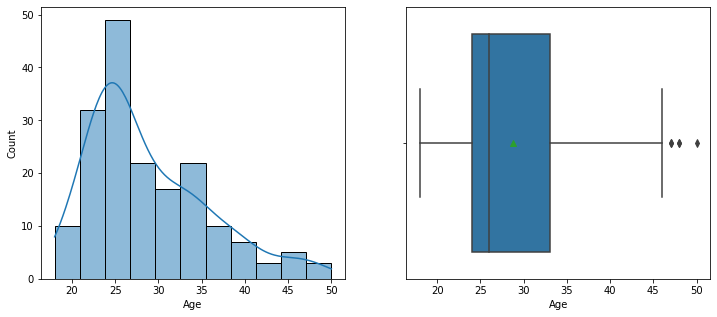

In [ ]:
myplot(df_sample = cardio_df, 
       xaxis = 'Age', 
       min_threshold =18, 
       max_threshold =46);

**Observation:**

1. Age is slightly right skewed distribution.
2. People at the age between 25 to 30 are more likely to use these products.
3. There are few people around or greater than 50 using these.

**Check how Usage is distributed among customers**

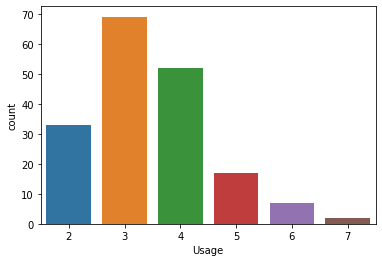

 0.0% of Customers are less than 2 which can be considered as Outliers in the data
 5.0% of Customers are more than 5 which can be considered as Outliers in the data


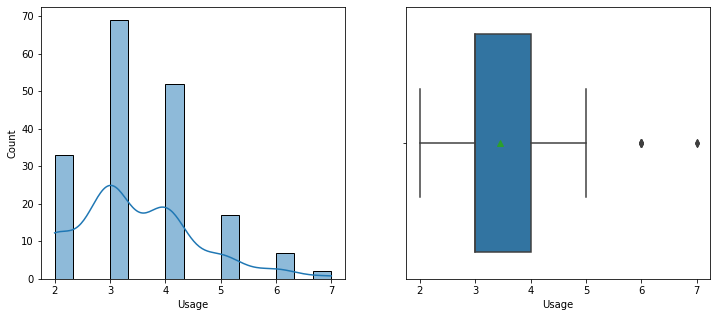

In [ ]:
sns.countplot(data = cardio_df, x='Usage');
plt.show();

myplot(df_sample = cardio_df, 
       xaxis = 'Usage', 
       min_threshold =2, 
       max_threshold =5);

**Observation**:

1. Most customers uses it 3 times a week.
2. Distribution is slightly right skewed with some people using it almost everyday (6-7) times.

 0.56% of Customers are less than 30000 which can be considered as Outliers in the data
 11.67% of Customers are more than 75000 which can be considered as Outliers in the data


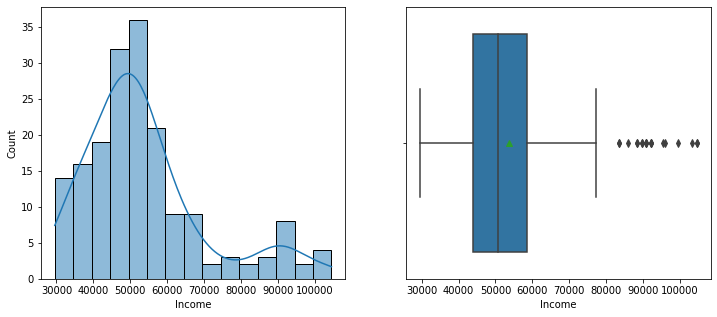

In [ ]:
myplot(df_sample = cardio_df, 
       xaxis = 'Income', 
       min_threshold = 30000, 
       max_threshold = 75000);
plt.show();

**Observation:**

1. Customers with income of around 50,000 have purchased most.
2. Income distribution is right skewed. 
3. There are some people (11.67% ) with income more than 75,000 who have also purchased the product but these looks like Outliers in the data.

**Lets see how much Miles people run on these Products**

 0.0% of Customers are less than 20 which can be considered as Outliers in the data
 10.56% of Customers are more than 175 which can be considered as Outliers in the data


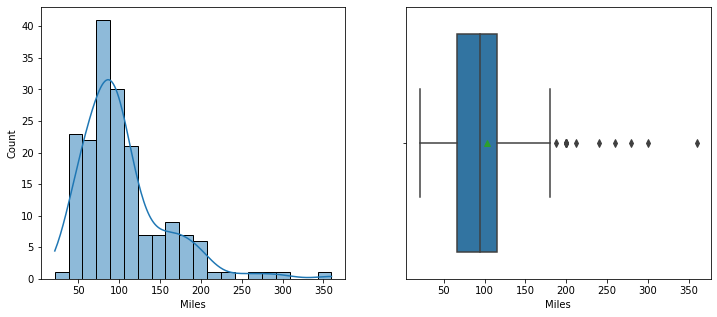

In [ ]:
myplot(df_sample = cardio_df, 
       xaxis = 'Miles', 
       min_threshold = 20, 
       max_threshold = 175);

**Observations:**

1. Most customers run around 75 miles on these machines.
2. Some do run above 175 miles (10.56% Customers), which can be considered as Outliers.


 0.0% of Customers are less than 12 which can be considered as Outliers in the data
 2.22% of Customers are more than 18 which can be considered as Outliers in the data


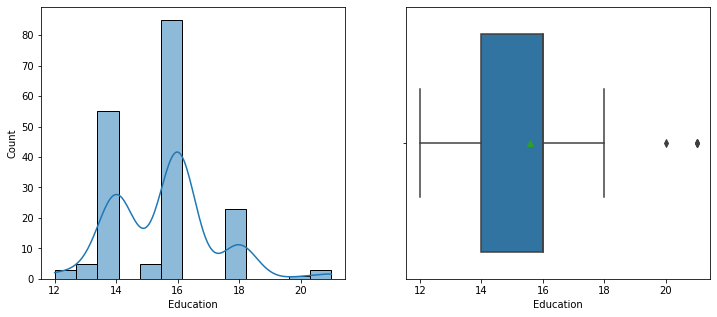

In [ ]:
myplot(df_sample = cardio_df, 
       xaxis = 'Education', 
       min_threshold = 12, 
       max_threshold = 18);

 **Observation:**

 1. Most people having education around 16 years (both Men and Women) are using this product.

**Plotting Categorical Variables with Sales**

In [ ]:
#A Function to add percentage % to the Count plots
def perc_cal(plot, feature):
   total = len(feature) # column length
   for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # class %
        x = p.get_x() + p.get_width() / 2 - 0.05 # width
        y = p.get_y() + p.get_height()           # hieght
        plot.annotate(percentage, (x, y), size = 15) # annotate %

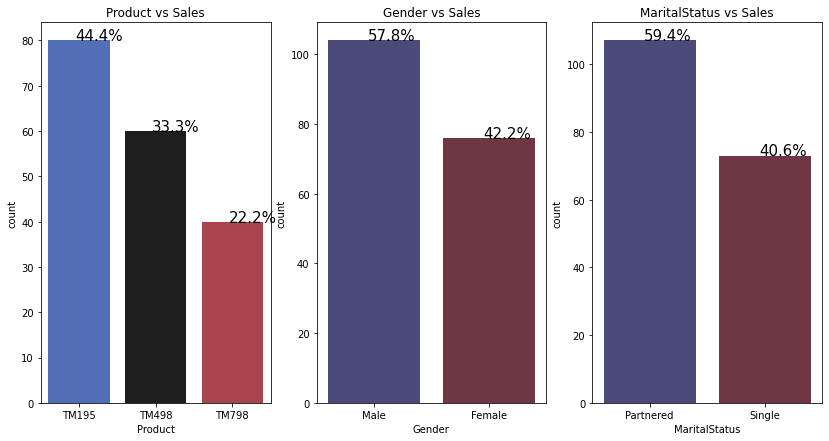

In [ ]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
cat_cols=['Product','Gender','MaritalStatus']
for i in range(len(cat_cols)):
    axis=sns.countplot(
        x=cat_cols[i], 
        data=cardio_df , 
        order= cardio_df[cat_cols[i]].value_counts(ascending=False).index,
        ax=axes1[i],
        palette='icefire').set(title=cat_cols[i] + ' vs Sales')
    perc_cal(axes1[i],cardio_df[cat_cols[i]])

**Summarizing Univariate Analysis**

1. Customer fitness is almost normally distributed. Only 1.11% of Customers considers themselves very less fit (<2).
2. Most customers uses TM195, followed by TM498 and TM798.
3. People at the age between 25 to 30 are more likely to use these fitness products.
4. Most customers uses it 3 times a week.
6. Customers with income of around 50,000 have purchased most.
7. Most customers run around 75 miles on these machines.
8. Most people having education around 16 years (both Men and Women) are using this product.

# **Bivariate Analysis**

**Check how Product is purchased across Gender & Marital Status**

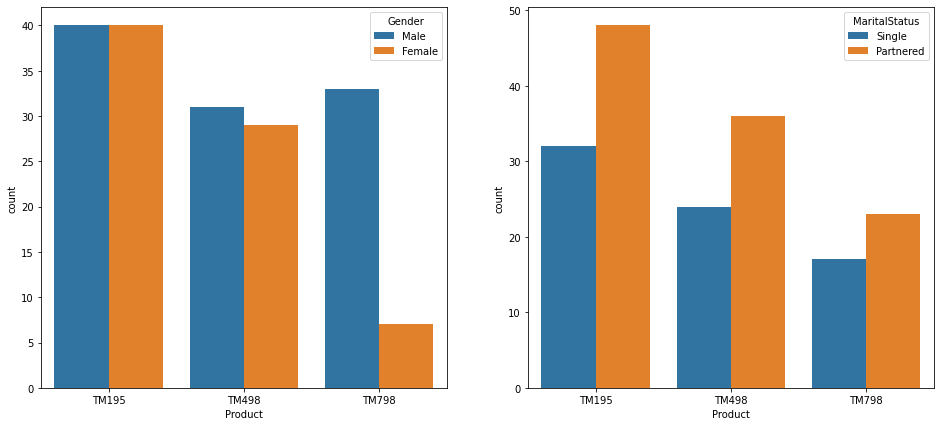

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,7))
sns.countplot(data=cardio_df, x='Product', hue= 'Gender', ax= axes[0]);
sns.countplot(data=cardio_df, x='Product', hue= 'MaritalStatus', ax= axes[1]);

**Observations**

1. TM195 is equally popular among Men & Women. 
2. TM798 is popular among Men.
3. TM498 is also liked by Men and Women both.
4. Partnered individuals (both Men and Women) are more interested in these Treadmills than singles.

**Exploring Heatmap to find the correlation of features**

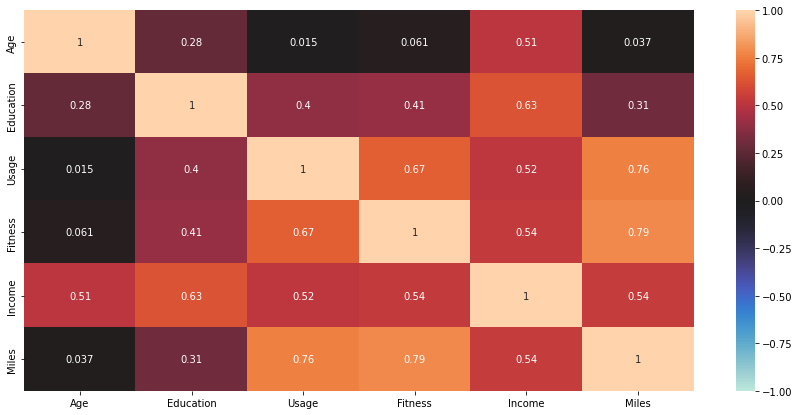

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data= cardio_df.corr(), cmap = 'icefire', annot = True, vmin = -1, vmax=1)
plt.show()

1. High positive correlation between Usage, Miles and Fitness.

2. The more it's used, it will add more Miles, and results in better Fitness.

3. Positive correlation also exists between Education and Income.
4. There is hardly any correlation between Age & Fitness/Usage/miles, hence it can be referred to customers of any age.


**For each Categorical feature (Product, Gender & Marital Status), we have to find how the numerical features are changing**

As usage increases, miles and then in turn fitness increases (from Heatmap), hence if we compare categorical fetatures with just Usage, we can draw conclusion of other two

In [ ]:
def cat_numerical_plot(p_categorical_var):
  fig1, axes1 =plt.subplots(2,2,figsize=(14, 10))
  num_cols=['Age','Income','Education','Usage']
  for i in range(len(num_cols)):
      row=i//2
      col=i%2
      ax=axes1[row,col]    
      sns.boxplot(y=cardio_df[num_cols[i]],
                x=cardio_df[p_categorical_var],
                ax=ax
                  ).set(title= p_categorical_var+' vs ' + num_cols[i])

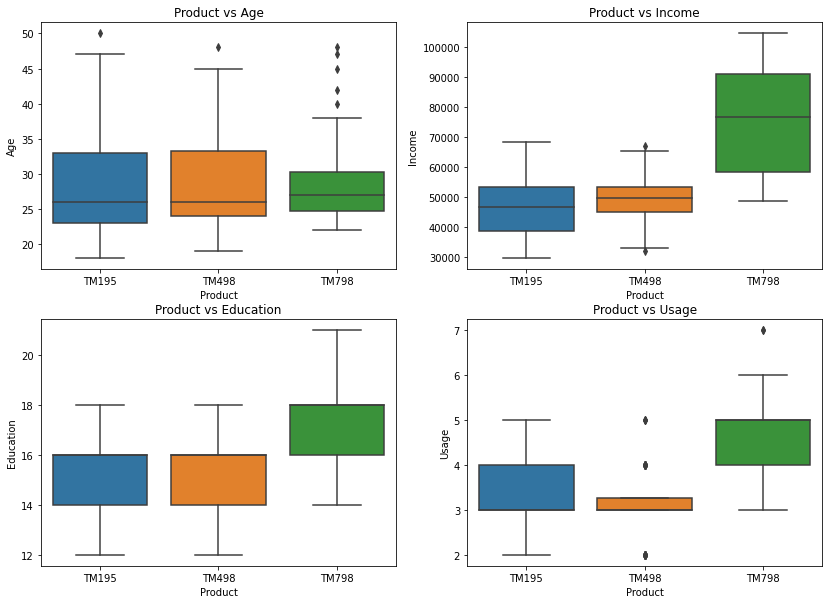

In [ ]:
  cat_numerical_plot('Product')

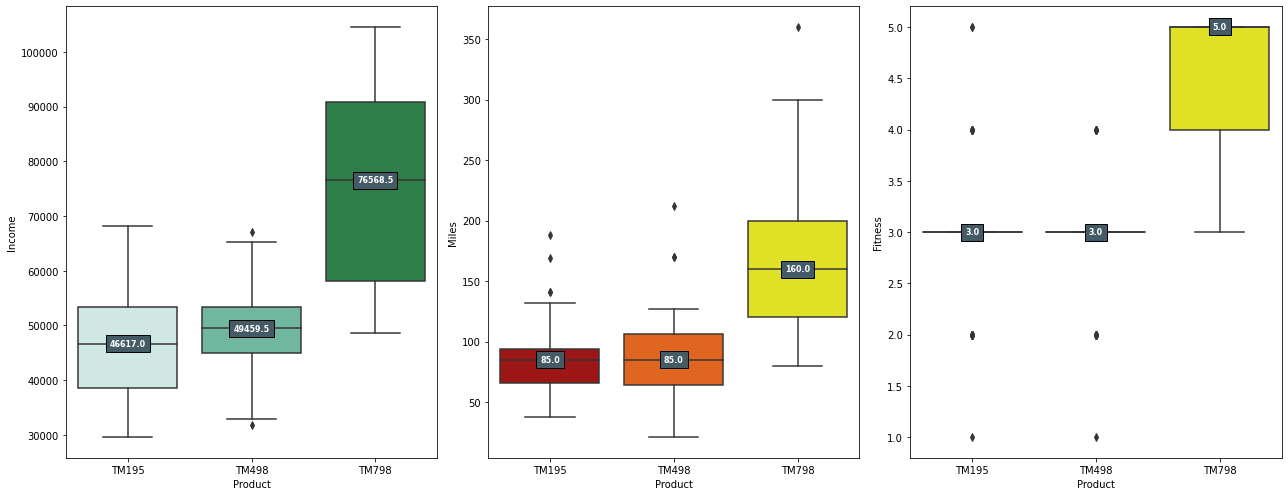

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,7))
# Labelling Income Median Values per Treadmill Models

box_plot = sns.boxplot(data=cardio_df, x='Product', y='Income', palette='BuGn', ax=axes[0])
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=8,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

box_plot2 = sns.boxplot(data=cardio_df, x='Product', y='Miles', palette='hot', ax=axes[1])
ax = box_plot2.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=8,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot2.figure.tight_layout()

box_plot3 = sns.boxplot(data=cardio_df, x='Product', y='Fitness', palette='hot', ax=axes[2])
ax = box_plot3.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=8,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot3.figure.tight_layout()

**Observation**

TM798:
1. It seems to be a high end expensive treadmill with advanced features and professional outlook. 
2. Customers with higher income are more towards TM798.
3. Customers with higher Usage which in turn indicates higher fitness and more miles, are inclined to TM798.
4. As education has positive correlation with Income, hence people with more education will earn more and can afford TM798.

TM195:
1. Seems like a generic Treadmill model which is widely spreadout.
2. Income group less than 70k tends to buy this model.
3. Median age of Customers is 26.

TM498:
1. Income group is also below 70k.
2. Customers who bought TM498 tends to have low to average usage (hence less miles and fitness) . 

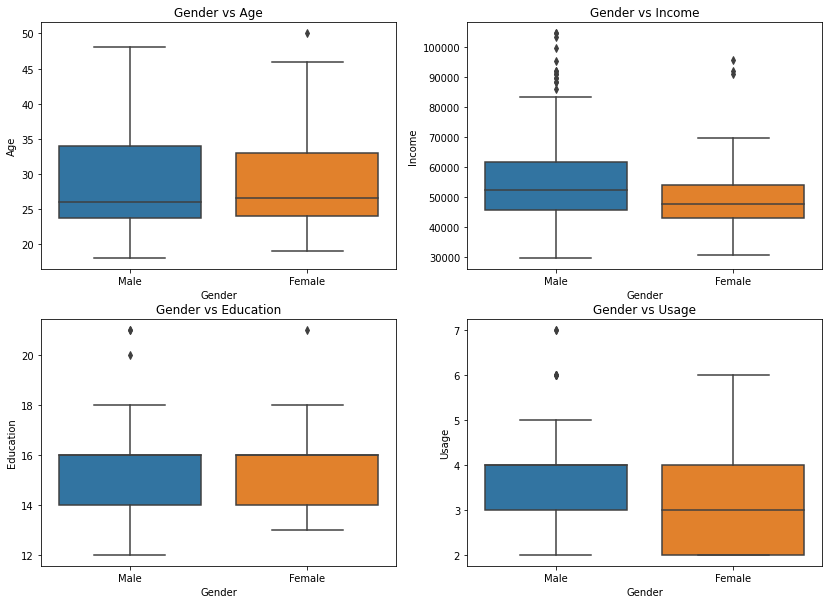

In [ ]:
cat_numerical_plot('Gender')

1. Male customers have better income.
2. Male customers have comparatively higher usage than Females.

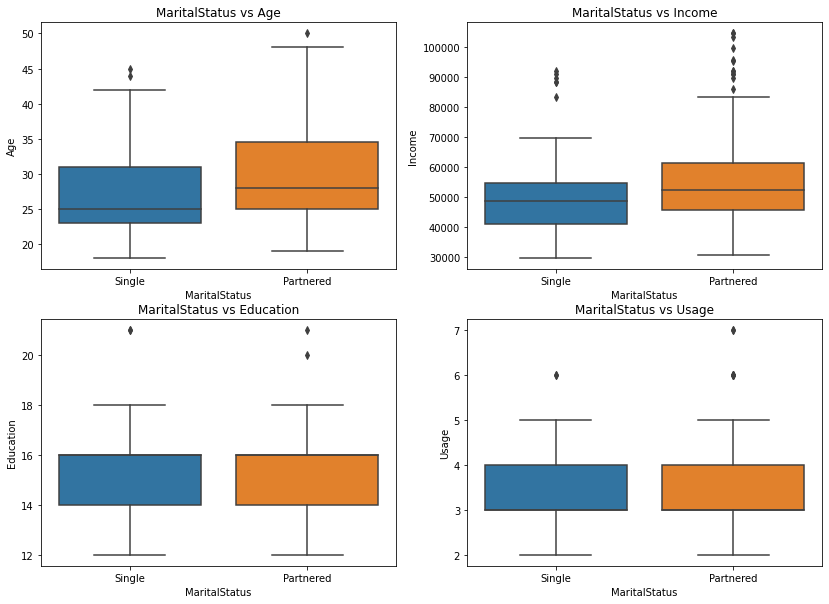

In [ ]:
cat_numerical_plot('MaritalStatus')

1. Partnered customers have higher income than singles.

**Summarizing Bivariate Analysis**

1. High positive correlation between Usage, Miles and Fitness.
2. The more it's used, it will add more Miles, and results in better Fitness.
3. Positive correlation also exists between Education and Income.
4. Male customers have better income.
5. Male customers have comparatively higher usage than Females.
6. Partnered customers have higher income than singles.
7. Partnered individuals (both Men and Women) are more interested in these Treadmills than singles.

*Product wise findings*:

TM798:
1. It seems to be a high end expensive treadmill with advanced features and professional outlook.
2. Customers with higher income are more towards TM798.
3. Customers with higher Usage which in turn indicates higher fitness and more miles, are inclined to TM798.
4. As education has positive correlation with Income, hence people with more education will earn more and can afford TM798.

TM195:
1. Seems like a generic Treadmill model which is widely spreadout.
2. Income group less than 70k tends to buy this model.

TM498:
1. Income group is also below 70k.
2. Customers who bought TM498 tends to have low to average usage (hence less miles and fitness) .

# **Multivariate Analysis**

**Creating a CrossTab Layout and Piechart based on Categorical Variables**

Gender           Female             Male       
MaritalStatus Partnered Single Partnered Single
Product                                        
TM195                27     13        21     19
TM498                15     14        21     10
TM798                 4      3        19     14


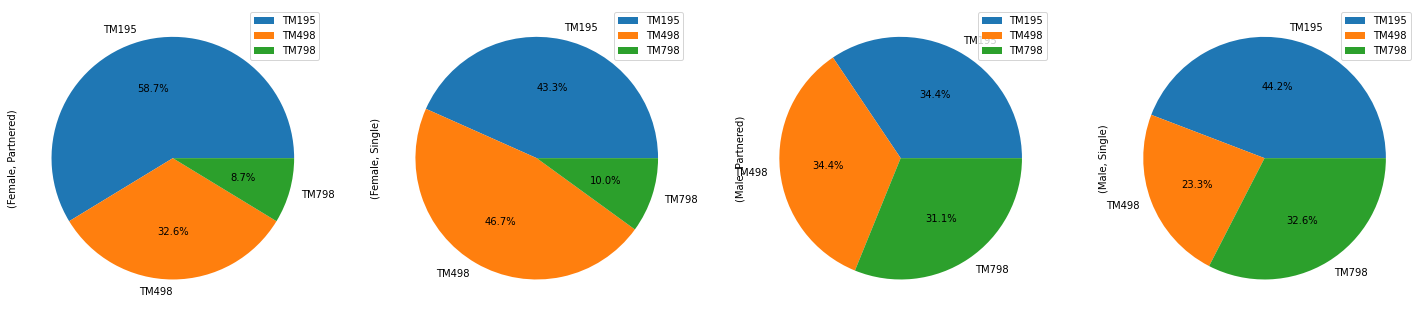

In [ ]:
product_seg = pd.crosstab(index= cardio_df['Product'], columns= [cardio_df['Gender'], cardio_df['MaritalStatus']])
print(product_seg)
product_seg.plot.pie(subplots = True, figsize=(25, 20), autopct='%1.1f%%');

**Observations**

1. Partnered Female mostly go for TM195.
2. Single Female customers bought TM498 more than Single male customers.
3. Partnered Male customers equally bought TM195 and TM498 models.
4. Majority of people who buy the TM798 are man.

**Fitness Score vs Product - Segregated by Gender and Marital Status**

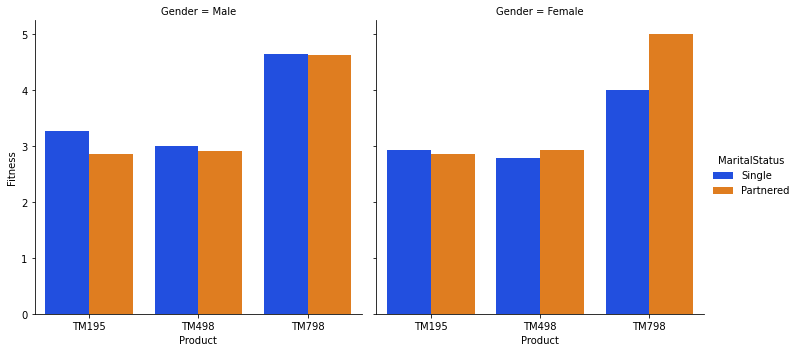

In [ ]:
sns.catplot(data= cardio_df,
            x= 'Product',
            y= 'Fitness',
            hue= 'MaritalStatus',
            col= 'Gender',
            kind= 'bar',
            palette= 'bright',
            ci = None);

1. Self given Fitness score of Customers using TM798 is much higher compared to other models.
2. Again, as fitness depends on usage and miles which is higher in TM798, hence we can see these Customers more fit.
3. Customers using other two products (TM195 and TM498) has average fitness scores.

**Studying how Age is affecting Models and Fitness**

In [ ]:
# Creating a New Column in Dataframe - 'Age Group' - based on 'Age' column using numpy select
conditions = [(cardio_df['Age'] > 17) & (cardio_df['Age'] <= 25),
              (cardio_df['Age'] > 25) & (cardio_df['Age'] <= 30),
              (cardio_df['Age'] > 30) & (cardio_df['Age'] <= 35),
              (cardio_df['Age'] > 35) & (cardio_df['Age'] <= 40),
              (cardio_df['Age'] > 40) & (cardio_df['Age'] <= 45),
              (cardio_df['Age'] > 45) & (cardio_df['Age'] <= 50)
              ]
values = ['18 - 25', '26-30', '31-35', '36-40', '41-45','45-50']
cardio_df['Age Group'] = np.select(conditions, values)

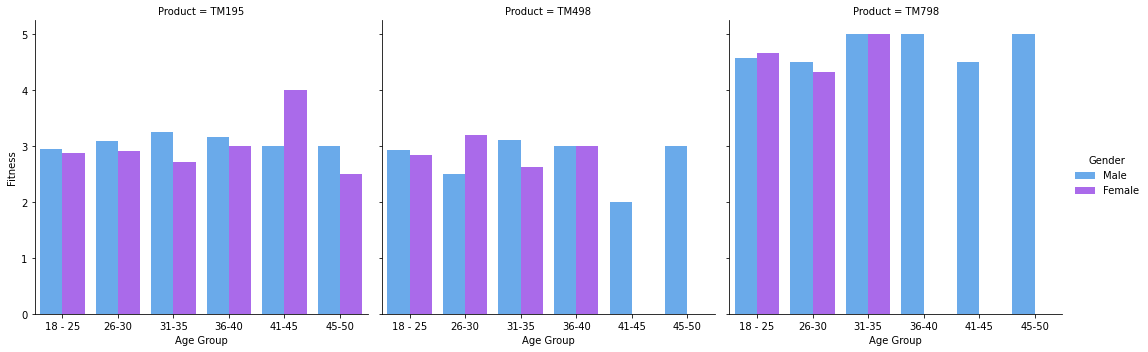

In [ ]:
#Measuring Fitness vs Age Groups across all Trade Mill Models
sns.catplot(data= cardio_df,
            x= 'Age Group',
            y= 'Fitness',
            hue= 'Gender',
            col= 'Product',
            kind= 'bar',
            palette= 'cool',
            ci = None);

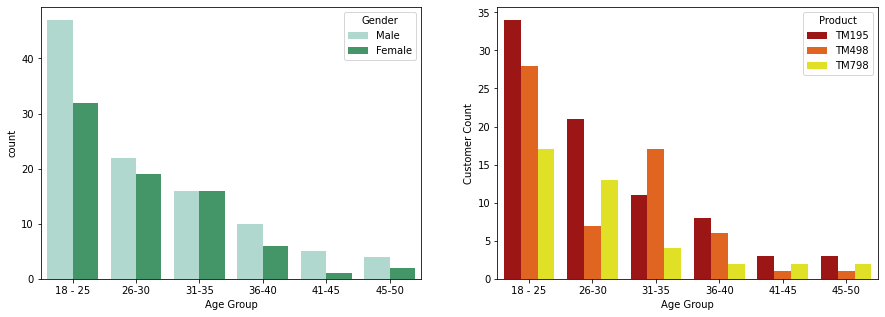

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

# Customer count and Age Groups by Gender
sns.countplot(data=cardio_df, x='Age Group', hue='Gender', palette='BuGn', ax=axes[0]);

# Customer count and Age Groups by Models
sns.countplot(data= cardio_df,
            x= 'Age Group',
            hue= 'Product',
            palette= 'hot',
            ax=axes[1]
            );
plt.ylabel('Customer Count');            

1. You may stay fit at any age and all that you need is your dedication and chosing the right product.
2. TM798 customers produces a higher fitness rate across any age.
3. As the age bucket increases, people are reluctant to buy these products.
4. TM195 is the most popular model across all age groups, but between 31-35, TM498 scores better.

**Studying Income Range and Products**

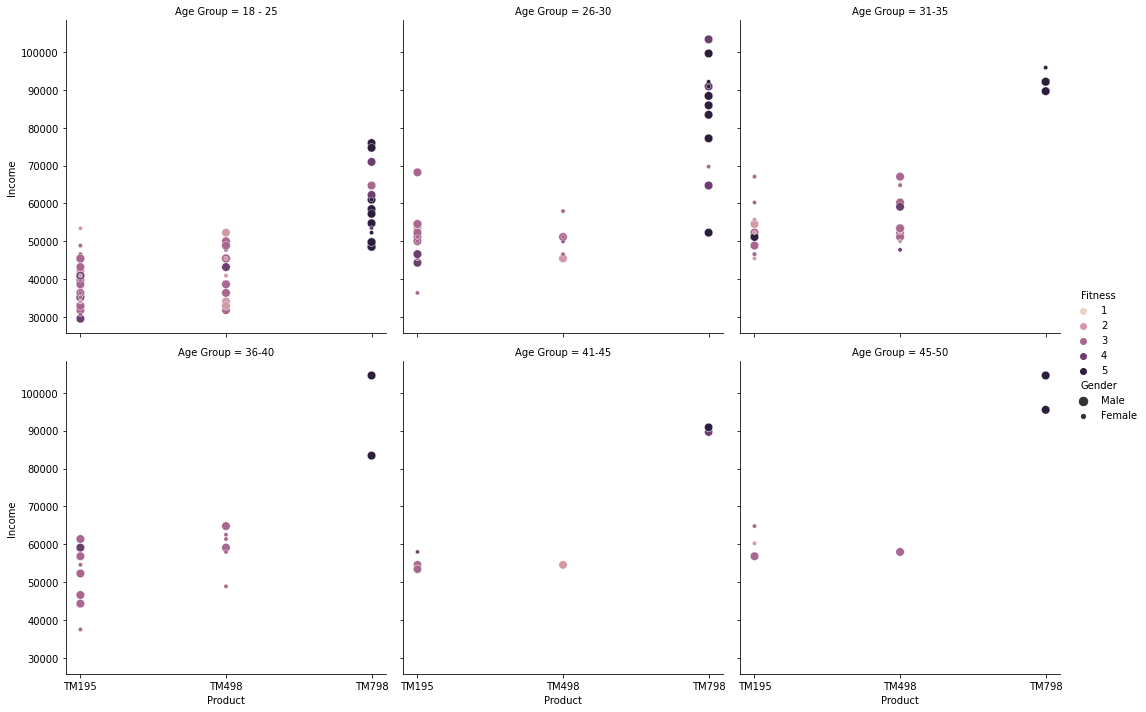

In [ ]:
sns.relplot(data=cardio_df, x="Product", y="Income", hue='Fitness', col="Age Group", size= 'Gender', ci=None,  col_wrap=3);

1. More customers are there at the age range of 18-25 and 26-30.
2. As the age increases, number of customers have decreased.
3. TM798 is there among high income group customers.

**Summarizing Multivariate Analysis**

1. Partnered Female mostly go for TM195.
2. Single Female customers bought TM498 more than Single male customers.
3. Partnered Male customers equally bought TM195 and TM498 models.
4. Majority of people who buy the TM798 are man.
5. Self given Fitness score of Customers using TM798 is much higher compared to other models.
6. Again, as fitness depends on usage and miles which is higher in TM798, hence we can see these Customers more fit.
7. Customers using other two products (TM195 and TM498) has average fitness scores.
8. As the age bucket increases, people are reluctant to buy these products.

# **My Findings**

**Customer Profile vs Treadmill Models**

**TM195**
1. Most popular model which covers nearly half (44.4%) of the customers.
2. Gender: Both Men & Women.
3. Marital Status: Both Single & Partnered (though Partnered customers are more interested in TMs in general than Singles)
4. Age Group: Median age of Customer is 26 and average of 28.5.
5. Education: 15 years on an average.
6. Usage: 3-4 times a week
7. Fitness: Average Fitness ratings (around 3)
8. Income: Average Income 46k, starts with as low as 30k.
9. Miles: Average (85 miles).

**TM498**
1. Second most popular model which covers one-third (33%) of the customers.
2. Gender: Both Men & Women.
3. Marital Status: Both Single & Partnered (Half of the Single Females use this)
4. Age Group: Median age of Customer is 26 and average of 29.9 and range between 24 and 33.
5. Education: 16 years on an average.
6. Usage: 3 times a week
7. Fitness: Average Fitness ratings (around 3)
8. Income: Average Income 49k.
9. Miles: Average (85 miles).

**TM798**
1. Second most popular model which covers one-third (33%) of the customers.
2. Gender: Popular among Men.
3. Marital Status: Both Single & Partnered.
4. Age Group: Median age of Customer is 27 and average of 29 (Popular among above 40 customers).
5. Education: Median is 18 years of education.
6. Usage: 5 times a week or more
7. Fitness: Very Fit (around 5)
8. Income: High Income (median = 76k).
9. Miles: Expected to cover Higher miles (160 miles).

**Insights & Recommendations**

1. TM195 can be projected as "Signature Model" based on it's widespread sales across all demographies.
2. Both TM195 & TM498 can be marketed as "Budget Treadmills" to attract customers around that income group.
3. High usage, high fitness, high income group customers together indicates TM798 must be a feature rich high end Treadmill which is expensive.
4. Fitness lovers or Professionals are more tend to buy TM798.
5. We need to find out why Women are not that much into TM798.
6. May be we can put some extra "Women Specific" features to TM798 to attract more female customers.
7. Customers are using TM195 / TM498 for a while and approaching towards a good fitness level, we can offer them to upgrade into the advanced model of TM798.
8. We may do some campaign to demonstrate fitness for pregnant women using the standard TM195 which will attract "would be mom" or gain confidence for females in 30s age group.
9. We can use above customer profiles for each Treadmills and develop a recommendation engine to bring Customer's or Prospect's attendtion.